<a href="https://colab.research.google.com/github/kulasekara02/hybrid_framework/blob/main/IEEE_Xplore_export_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving export2025.12.24-19.03.15.csv to export2025.12.24-19.03.15.csv
Loaded: export2025.12.24-19.03.15.csv
Rows, Cols: (1000, 28)
Columns: ['Document Title', 'Authors', 'Author Affiliations', 'Publication Title', 'Date Added To Xplore', 'Publication Year', 'Volume', 'Issue', 'Start Page', 'End Page', 'Abstract', 'ISSN', 'ISBNs', 'DOI', 'Funding Information', 'PDF Link', 'Author Keywords', 'IEEE Terms', 'Mesh_Terms', 'Article Citation Count', 'Patent Citation Count', 'Reference Count', 'License', 'Online Date', 'Issue Date', 'Meeting Date', 'Publisher', 'Document Identifier']

Counts table (top rows):


Publication Type,Book Section,Conference Paper,Journal Article
Publication Year,,,
2009,0,2,0
2010,0,2,0
2011,0,3,0
2012,0,3,0
2013,0,4,0


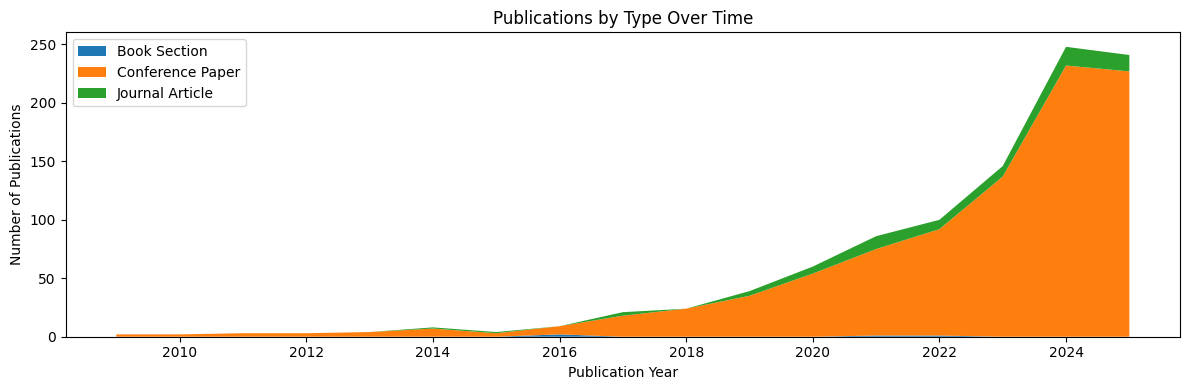

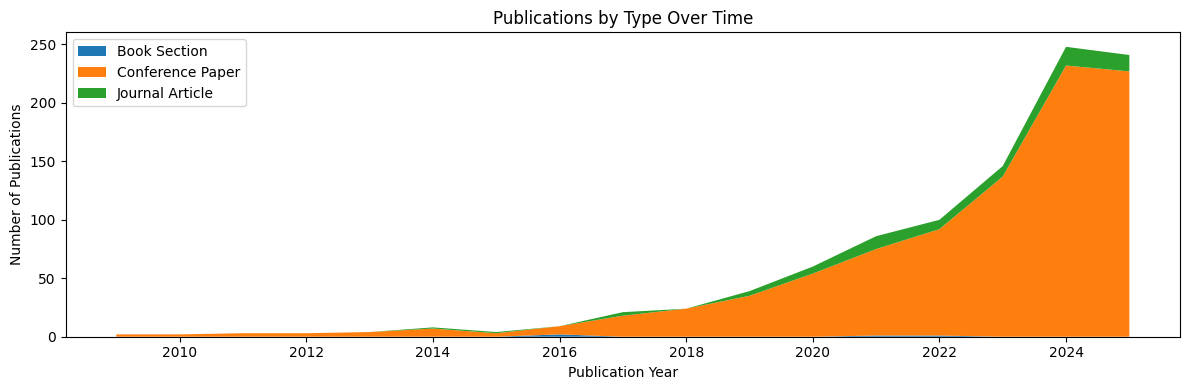

Saved image: publication_types_stacked_area.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ============================================================
# FULL GOOGLE COLAB NOTEBOOK CODE (upload CSV -> stacked area)
# Works with your IEEE Xplore export CSV
# ============================================================

# 1) Upload CSV
from google.colab import files
uploaded = files.upload()   # choose your file: export2025.12.24-19.03.15.csv
csv_path = list(uploaded.keys())[0]
print("Loaded:", csv_path)

# 2) Read CSV
import pandas as pd
import numpy as np

df = pd.read_csv(csv_path)
print("Rows, Cols:", df.shape)
print("Columns:", list(df.columns))

# 3) Ensure required columns exist
required_cols = ["Publication Year", "Document Identifier"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(
        f"Missing columns: {missing}\n"
        f"Your CSV columns are: {list(df.columns)}\n"
        "If your file is different, tell me the column names you have."
    )

# 4) Clean Year
df["Publication Year"] = pd.to_numeric(df["Publication Year"], errors="coerce")
df = df.dropna(subset=["Publication Year"])
df["Publication Year"] = df["Publication Year"].astype(int)

# 5) Map IEEE "Document Identifier" to publication types
def map_pub_type(doc_id) -> str:
    if pd.isna(doc_id):
        return "Other"
    s = str(doc_id).lower()

    # Conference papers
    if "conference" in s:
        return "Conference Paper"

    # Book chapters / sections
    if "ebook chapter" in s or "book chapter" in s or "chapter" in s:
        return "Book Section"

    # Journals / magazines / early access
    if "journal" in s or "magazine" in s or "early access" in s:
        return "Journal Article"

    # Books (rare)
    if "book" in s and "chapter" not in s:
        return "Book"

    return "Other"

df["Publication Type"] = df["Document Identifier"].apply(map_pub_type)

# 6) Build counts per year x publication type
counts = (
    df.groupby(["Publication Year", "Publication Type"])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

# (Optional) Force a continuous year range (fills missing years with 0)
min_year = int(df["Publication Year"].min())
max_year = int(df["Publication Year"].max())
all_years = pd.Index(range(min_year, max_year + 1), name="Publication Year")
counts = counts.reindex(all_years, fill_value=0)

# (Optional) Set column order like your legend
preferred_order = ["Book Section", "Conference Paper", "Journal Article", "Book", "Other"]
ordered_cols = [c for c in preferred_order if c in counts.columns] + \
              [c for c in counts.columns if c not in preferred_order]
counts = counts[ordered_cols]

print("\nCounts table (top rows):")
display(counts.head())

# 7) Plot stacked area chart (like your screenshot)
import matplotlib.pyplot as plt

years = counts.index.to_numpy()
series = [counts[c].to_numpy() for c in counts.columns]

plt.figure(figsize=(12, 4))
plt.stackplot(years, series, labels=counts.columns)
plt.title("Publications by Type Over Time")
plt.xlabel("Publication Year")
plt.ylabel("Number of Publications")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

# 8) Save as high-quality image (for Word/Thesis)
out_png = "publication_types_stacked_area.png"
plt.figure(figsize=(12, 4))
plt.stackplot(years, series, labels=counts.columns)
plt.title("Publications by Type Over Time")
plt.xlabel("Publication Year")
plt.ylabel("Number of Publications")
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig(out_png, dpi=300)
plt.show()

print("Saved image:", out_png)

# 9) Download the image
files.download(out_png)
